In [1]:
import lenstronomy
import numpy as np
import matplotlib.pyplot as plt


## Theory of Gravitational Lensing by a Point Mass

Gravitational lensing is a phenomenon predicted by Einstein's theory of General Relativity. It occurs when the gravitational field of a massive object, such as a galaxy or a black hole, warps the fabric of spacetime, bending the paths along which light travels. This effect can cause the light from a distant source, like a galaxy or a star, to be magnified and distorted as it passes near the massive object.

### Point Mass Lens

In the simplest case of gravitational lensing, the lens is assumed to be a point mass, meaning that its gravitational influence can be described as if all its mass were concentrated at a single point. This model is an idealized case but provides a fundamental understanding of how mass affects light. The key quantity in this scenario is the Einstein radius, which characterizes the typical angular scale of lensing effects.

The Einstein radius $\theta_E$ is given by the formula:

\begin{equation}
\theta_E = \sqrt{\frac{4GM}{c^2} \frac{D_{LS}}{D_{L}D_{S}}}
\end{equation}

where:
- $G$ is the gravitational constant,
- $M$ is the mass of the lens,
- $c$ is the speed of light,
- $D_{L}$ is the distance to the lens,
- $D_{S}$ is the distance to the source, and
- $D_{LS}$ is the distance from the lens to the source.

### Lensing Effect

A point mass lens creates two images of the source. The position and magnification of these images depend on the alignment of the source, lens, and observer. When the source is directly behind the lens, a ring-shaped image known as an "Einstein ring" is formed. The size of this ring is proportional to the Einstein radius.

### Simulation

The code provided simulates the gravitational lensing effect of a point mass on a distant light source. It uses the following components:
- A `LensModel` that defines the lensing mass as a point mass with its associated Einstein radius.
- A `LightModel` that defines the brightness profile of the source galaxy using a Sersic profile.
- A `PixelGrid` that sets up the image plane where the lensed image will be computed.
- A `PSF` (Point Spread Function) that models the blurring effect of the telescope optics.

The image is simulated by calculating the deflection of light rays from the source as they pass by the lensing mass. The resulting image shows how the source appears to an observer when lensed by the point mass.

This simplified model helps us understand and predict the qualitative features of gravitational lensing in more complex systems.


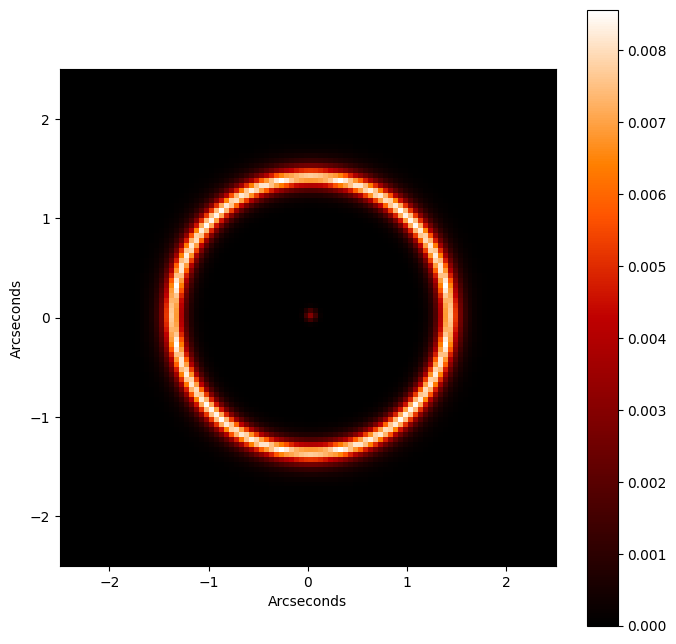

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.LightModel.light_model import LightModel
from lenstronomy.Data.pixel_grid import PixelGrid
from lenstronomy.Data.psf import PSF
from lenstronomy.ImSim.image_model import ImageModel
from lenstronomy.Util import constants as const

def simulate_gravitational_lensing(mass_lens, distance_source):
    # Constants for the Einstein radius calculation
    G = const.G  
    c = const.c  
    
    lens_model_list = ['POINT_MASS']
    lens_model = LensModel(lens_model_list)
    
    mass_lens_kg = mass_lens * const.M_sun  
    D_s = distance_source * const.Mpc  
    D_l = 0.5 * D_s  
    D_ls = D_s - D_l
    theta_E = np.sqrt((4 * G * mass_lens_kg / c**2) * (D_ls / (D_l * D_s)))  
    
    kwargs_lens = [{'theta_E': theta_E, 'center_x': 0, 'center_y': 0}]
    
    # Set up the image grid
    delta_pix = 0.05  
    num_pix = 100  
    half_width = num_pix / 2 * delta_pix
    kwargs_pixel = {'nx': num_pix, 'ny': num_pix, 'ra_at_xy_0': -half_width, 'dec_at_xy_0': -half_width,
                    'transform_pix2angle': np.array([[delta_pix, 0], [0, delta_pix]])}
    pixel_grid = PixelGrid(**kwargs_pixel)
    
    # Define a simple PSF
    kwargs_psf = {'psf_type': 'GAUSSIAN', 'fwhm': 0.1}
    psf = PSF(**kwargs_psf)
    
    # Define the light model of the source galaxy as a Sersic profile
    light_model_list = ['SERSIC']
    light_model = LightModel(light_model_list)
    kwargs_source = [{'amp': 1, 'R_sersic': 0.2, 'n_sersic': 1, 'center_x': 0, 'center_y': 0}]
    
    # Create the image model using the components we have defined
    image_model = ImageModel(data_class=pixel_grid, psf_class=psf, lens_model_class=lens_model,
                             source_model_class=light_model)
    
    # Simulate the image
    image_simulated = image_model.image(kwargs_lens=kwargs_lens, kwargs_source=kwargs_source)
    
    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(image_simulated, origin='lower', cmap='gist_heat', extent=[-half_width, half_width, -half_width, half_width])
    plt.colorbar()
    plt.xlabel('Arcseconds')
    plt.ylabel('Arcseconds')
    plt.show()


mass = 1e22 
distance = 1e3  
simulate_gravitational_lensing(mass, distance)


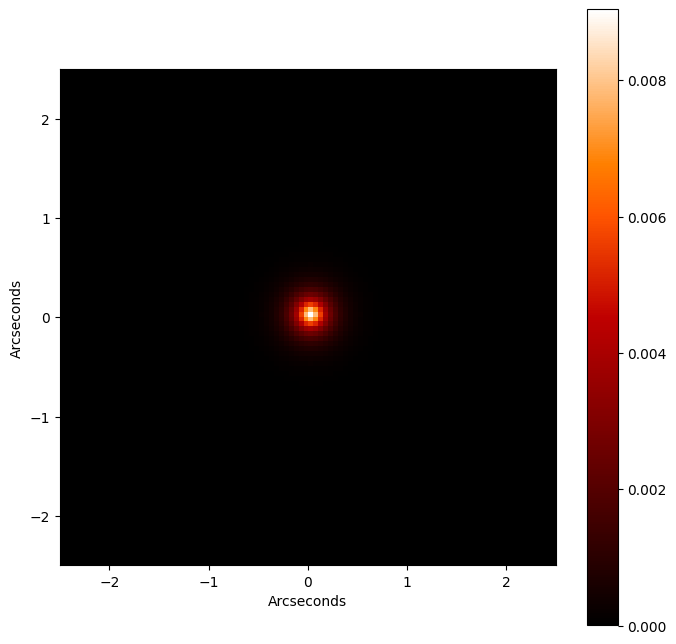

In [3]:
mass = 1e11
distance = 500
simulate_gravitational_lensing(mass, distance)

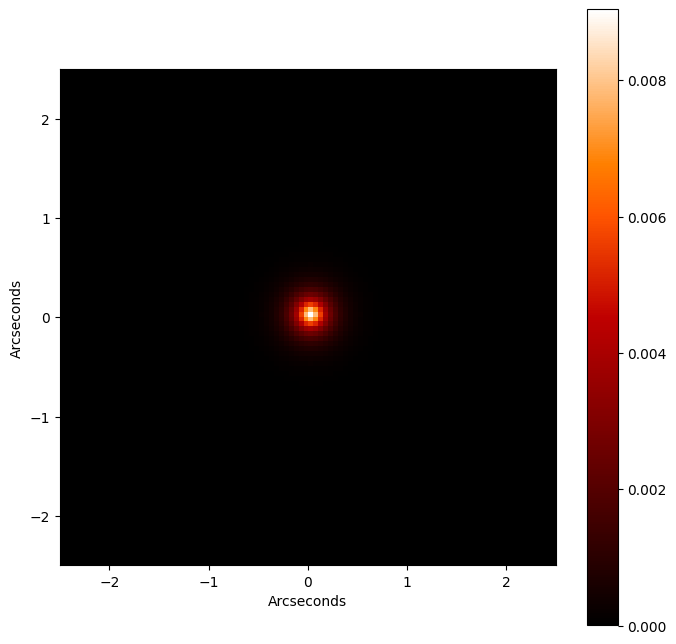

In [4]:
mass = 1e12
distance = 1000
simulate_gravitational_lensing(mass, distance)

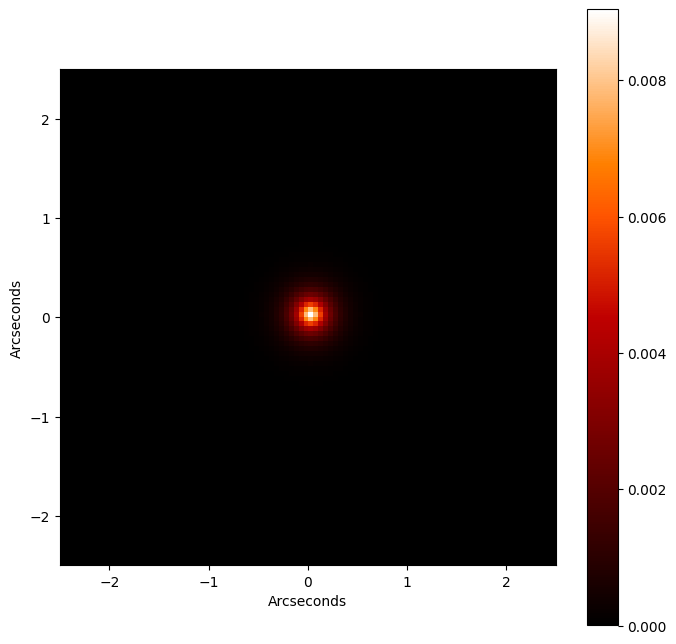

In [6]:
mass = 1e15
distance = 1000
simulate_gravitational_lensing(mass, distance)

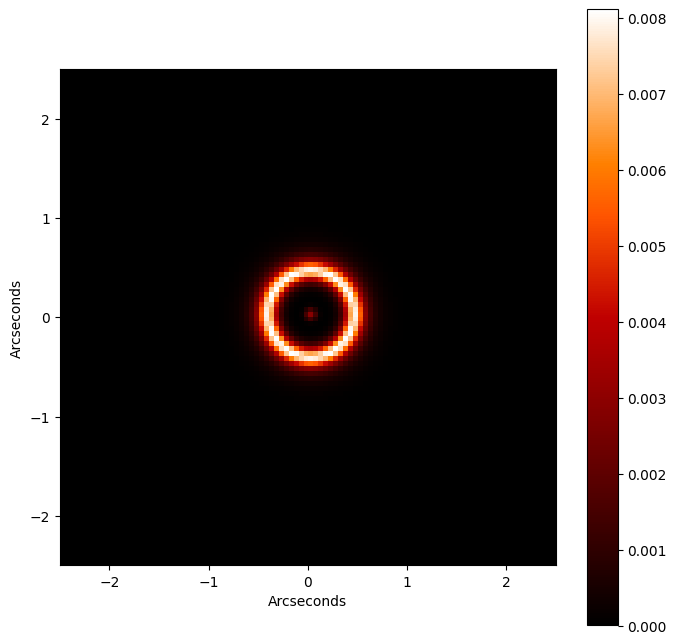

In [9]:
mass = 1e21
distance = 1000
simulate_gravitational_lensing(mass, distance)